In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
from imutils import auto_canny

In [2]:
def imshow(image):
    plt.imshow(imutils.opencv2matplotlib(image))
    plt.show()


def cv2_imshow(image):
    cv2.imshow('image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
# 打开图像，原图
image = cv2.imread('answer_card.jpg')
# 图像尺寸
height, width, channels = image.shape
print(f"Image size: {width}x{height} ({channels} channels)")

Image size: 3317x2346 (3 channels)


In [4]:
#灰度处理
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#高斯模糊
blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)
kernel = np.ones((3, 3), np.uint8)
blurred = cv2.erode(blurred, kernel, iterations=1) # 腐蚀
blurred = cv2.dilate(blurred, kernel, iterations=2) # 膨胀
#边缘检测
edged_image = auto_canny(blurred)

In [5]:
#轮廓检测
# https://www.jianshu.com/p/83f714a4dbc7
cnts, _ = cv2.findContours(edged_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#按轮廓大小降序排列
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

In [6]:
# 提取的轮廓总数
contour_size = 0
# 检测到的左右答题区域轮廓
answer_cnts = []

for c in cnts:
    # arcLength 计算周长
    peri = cv2.arcLength(c, True)
    # print("轮廓周长：", peri)

    # 之前寻找到的轮廓可能是多边形，现在通过寻找近似轮廓，得到期望的四边形
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # print('原始轮廓的边数:', len(c), ', 近似轮廓的边数:', len(approx))

    # 当近似轮廓为4时，代表是需要提取的矩形区域
    if len(approx) == 4:
        contour_size = contour_size + 1
        answer_cnts.append(approx)

    if contour_size == 2:
        break

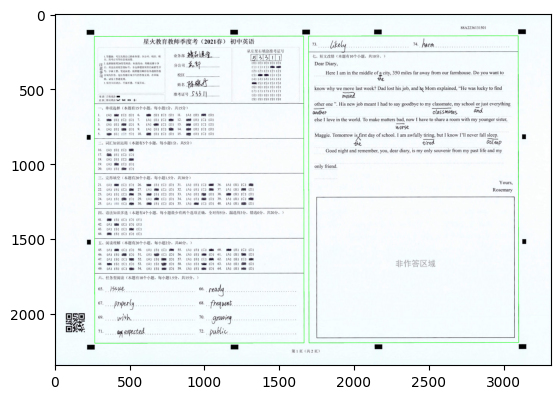

In [7]:
cv2.drawContours(image, answer_cnts, -1, (0, 255, 0), 2)
imshow(image)